In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d/{}/checkpoints/sines/MLP2_DKT_test_results.npy'

In [3]:
kernel='nn'

In [4]:
data = np.load(prefix.format(kernel), allow_pickle=True).item()

In [5]:
data.keys()

dict_keys(['mse_list', 'nll_list', 'mean', 'lower', 'upper', 'x', 'y', 'mse', 'mse_std', 'nll', 'nll_std'])

In [6]:
data["mse"]

[0.02400265]

In [7]:
data["mse_std"]

[0.015421757]

In [8]:
kernels = ["rbf","spectral","nn","flow_rbf","flow_spectral","flow_nn"]

In [37]:
def get_table(prefix, kernels):
    results = {"method":[], "mse":[], "nll":[]}
    for k in kernels:
            try:
                if "flow" in k:
                    m = "NGGP"
                else:
                    m = "DKT"
                data = np.load(prefix.format(k, m), allow_pickle=True).item()
                results["method"].append(k)
                results["mse"].append("{:.3f} \pm {:.3f}".format(np.round(data["mse"][0],3),np.round(data["mse_std"][0],3)))
                results["nll"].append("{:.3f} \pm {:.3f}".format(np.round(data["nll"][0],3),np.round(data["nll_std"][0],3)))
            except IOError as e:
                results["method"].append(k)
                results["mse"].append(np.nan)
                results["nll"].append(np.nan)
                print(e)
    return pd.DataFrame.from_dict(results)

In [38]:
import torch

In [39]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/res_sines/{}/checkpoints/sines/MLP2_{}_test_results.npy'
sines1_in_range = get_table(prefix,['spectral', 'flow_spectral'])
prefix='/home/anowak/projects/deep-kernel-transfer/save/res_sines/{}/checkpoints/sines/MLP2_{}_outr_test_results.npy'
sines1_out_range = get_table(prefix,['spectral', 'flow_spectral'])


In [42]:
sines1_in_range

,method,mse,nll
0,spectral,0.017 \pm 0.008,-0.838 \pm 0.048
1,flow_spectral,0.019 \pm 0.009,-0.769 \pm 0.087


In [43]:
sines1 = sines1_in_range.merge(sines1_out_range, on="method", suffixes=("_in_range", "_out_range"))

In [44]:
sines1

,method,mse_in_range,nll_in_range,mse_out_range,nll_out_range
0,spectral,0.017 \pm 0.008,-0.838 \pm 0.048,0.023 \pm 0.022,-0.798 \pm 0.057
1,flow_spectral,0.019 \pm 0.009,-0.769 \pm 0.087,2.654 \pm 5.103,10.406 \pm 13.566


In [40]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
sines_in_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d/{}/checkpoints/sines/MLP2_DKT_outr_test_results.npy'
sines_out_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
sinesh_in_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero/{}/checkpoints/sines/MLP2_DKT_outr_test_results.npy'
sinesh_out_range = get_table(prefix,kernels)

In [12]:
sines = sines_in_range.merge(sines_out_range, on="method", suffixes=("_in_range", "_out_range"))

In [13]:
sinesh = sinesh_in_range.merge(sinesh_out_range, on="method", suffixes=("_in_range", "_out_range"))

In [14]:
sines

,method,mse_in_range,nll_in_range,mse_out_range,nll_out_range
0,rbf,1.357 \pm 1.640,-0.760 \pm 0.057,2.942 \pm 2.697,-0.694 \pm 0.060
1,spectral,0.019 \pm 0.010,-0.835 \pm 0.052,0.036 \pm 0.034,-0.698 \pm 0.140
2,nn,0.024 \pm 0.015,-0.732 \pm 0.111,6.614 \pm 31.631,38.385 \pm 40.160
3,flow_rbf,1.020 \pm 1.400,-0.736 \pm 0.066,3.020 \pm 2.530,-0.653 \pm 0.081
4,flow_spectral,0.018 \pm 0.010,-0.833 \pm 0.052,0.026 \pm 0.022,-0.799 \pm 0.067
5,flow_nn,0.038 \pm 0.030,-0.727 \pm 0.102,7.335 \pm 12.852,29.859 \pm 27.970


In [15]:
sinesh

,method,mse_in_range,nll_in_range,mse_out_range,nll_out_range
0,rbf,1.290 \pm 1.736,-0.458 \pm 0.077,2.197 \pm 2.284,-0.587 \pm 0.067
1,spectral,0.140 \pm 0.406,-0.521 \pm 0.063,0.169 \pm 0.411,-0.654 \pm 0.053
2,nn,0.032 \pm 0.016,-0.506 \pm 0.075,4.350 \pm 9.728,24.462 \pm 24.492
3,flow_rbf,0.979 \pm 1.336,-0.509 \pm 0.068,3.130 \pm 2.680,-0.681 \pm 0.078
4,flow_spectral,0.136 \pm 0.434,-0.527 \pm 0.067,0.168 \pm 0.428,-0.633 \pm 0.058
5,flow_nn,0.038 \pm 0.021,-0.558 \pm 0.062,7.288 \pm 13.816,20.710 \pm 22.543


# Sines DATASET

In [15]:
""" Code for loading data. """

import numpy as np

INPUT_DIM = 1


class SinusoidalDataGenerator(object):
    """
    Data Generator capable of generating batches of sinusoid data.
    A "class" is considered a particular sinusoid function.
    """

    def __init__(self, num_samples_per_class, batch_size, output_dim=1, multidimensional_amp=False,
                 multidimensional_phase=True, noise=True, out_of_range=False):
        """
        Args:
            num_samples_per_class: num samples to generate per class in one batch
            batch_size: size of meta batch size (e.g. number of functions)
        """
        self.batch_size = batch_size
        self.num_samples_per_class = num_samples_per_class
        self.num_classes = 1  # by default 1 (only relevant for classification problems)

        self.generate = self.generate_sinusoid_batch
        self.amp_range = [0.1, 5.0]
        self.phase_range = [0, np.pi]
        self.input_range = [-5.0, 5.0]
        if out_of_range:
            self.input_range = [-5.0, 10.0]
        self.dim_input = INPUT_DIM
        self.dim_output = output_dim
        self.multidimensional_amp = multidimensional_amp
        self.multidimensional_phase = multidimensional_phase
        self.noise = noise
        #self.split_intervals = [(-5.0, -2.5), (-2.5, 0.0), (0.0, 2.5), (2.5, 5.0)]
        #self.split_intervals = [(-5.0, -3.75), (-3.75, -2.5), (-2.5, -1.25), (-1.25, 0.0),
        #                        (0.0, 1.25), (1.25, 2.5), (2.5, 3.75), (3.75, 5)]

    def generate_sinusoid_batch(self, input_idx=None):
        # input_idx is used during qualitative testing --the number of examples used for the grad update



        if self.multidimensional_amp:
            # y_1 = A_1*sinus(x_1+phi)
            # y_2 = A_2*sinus(x_2+phi)
            # ...
            amp = np.random.uniform(self.amp_range[0], self.amp_range[1], [self.batch_size, self.dim_output])
        else:
            # y_1 = A*sinus(x_1+phi)
            # y_2 = A*sinus(x_2+phi)
            # ...
            amp = np.random.uniform(self.amp_range[0], self.amp_range[1], [self.batch_size])

        if self.multidimensional_phase:
            # y_1 = A*sinus(x_1+phi_1)
            # y_2 = A*sinus(x_2+phi_2)
            # ...
            phase = np.random.uniform(self.phase_range[0], self.phase_range[1], [self.batch_size, self.dim_output])
        else:
            # y_1 = A*sinus(x_1+phi)
            # y_2 = A*sinus(x_2+phi)
            # ...
            phase = np.random.uniform(self.phase_range[0], self.phase_range[1], [self.batch_size])

        if self.noise == "gaussian" or self.noise =="hetero_multi":
            noise = np.random.normal(0, 0.1, [self.batch_size, self.num_samples_per_class, self.dim_output])
        elif self.noise == "heterogeneous":

            #noise = [np.random.normal(0, 0.1, [self.batch_size, self.num_samples_per_class, self.dim_output]),
            #              np.random.normal(0, 0.2, [self.batch_size, self.num_samples_per_class, self.dim_output]),
            #              np.random.uniform(-0.2, 0.2, [self.batch_size, self.num_samples_per_class, self.dim_output]),
            #              np.random.normal(-0.1, 0.1, [self.batch_size, self.num_samples_per_class, self.dim_output]),]
            noise = [np.random.uniform(-0.1,0.1, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.normal(0, 0.75, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.uniform(-0.2, 0.2, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.normal(0, 0.75, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.uniform(-0.2, 0.2, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.uniform(-0.1, 0.1, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.normal(0, 0.75, [self.batch_size, self.num_samples_per_class, self.dim_output]),
                          np.random.uniform(-0.1, 0.1, [self.batch_size, self.num_samples_per_class, self.dim_output])]
        elif self.noise == "exp":
            noise = np.random.exponential(0.2,size=[self.batch_size, self.num_samples_per_class, self.dim_output])
        else:
            noise = np.zeros([self.batch_size, self.num_samples_per_class, self.dim_output])

        outputs = np.zeros([self.batch_size, self.num_samples_per_class, self.dim_output])
        init_inputs = np.zeros([self.batch_size, self.num_samples_per_class, self.dim_input])
        for func in range(self.batch_size):
            numbers = np.random.rand(7) * 10 - 5
            sorted = np.sort(numbers)
            self.split_intervals = [(-5.0, sorted[0])]
            for i in range(1, len(sorted)):
                self.split_intervals += [(sorted[i-1], sorted[i])]
            self.split_intervals += [(sorted[-1], 5.0)]

            init_inputs[func] = np.random.uniform(self.input_range[0], self.input_range[1],
                                                  [self.num_samples_per_class, self.dim_input])
            if input_idx is not None:
                init_inputs[:, input_idx:, 0] = np.linspace(self.input_range[0], self.input_range[1],
                                                            num=self.num_samples_per_class - input_idx, retstep=False)


            outputs[func] = amp[func] * np.sin(init_inputs[func] - phase[func])
            if self.noise == "heterogeneous":
                for i, s in enumerate(self.split_intervals):
                    mask = (init_inputs[func]>=s[0]) & (init_inputs[func]<s[1])
                    outputs[func][mask]=outputs[func][mask]+noise[i][func][mask]
            elif self.noise == "hetero_multi" or self.noise == "exp":
                outputs[func] = amp[func]*np.sin(init_inputs[func] + phase[func])+abs((init_inputs[func] + phase[func]))*noise[func]
            #elif self.noise == "exp":
            #    print("HERE")
            #    outputs[func] = amp[func]*np.sin(init_inputs[func] + phase[func])+noise[func]
            else:
                outputs[func] = outputs[func] + noise[func]
        return init_inputs.astype(np.float32), outputs.astype(np.float32), amp.astype(np.float32), phase.astype(
            np.float32)

In [16]:
generator = SinusoidalDataGenerator(200,10,multidimensional_phase=False,noise="gaussian")

In [17]:
X, y, amp, phase = generator.generate_sinusoid_batch()

In [18]:
X.shape

(10, 200, 1)

In [19]:
import matplotlib.pyplot as plt

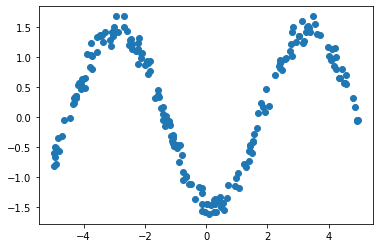

In [20]:
plt.scatter(X[0].reshape(-1), y[0])

In [21]:
generator = SinusoidalDataGenerator(500,10,multidimensional_phase=False,noise="hetero_multi")

In [22]:
X, y, amp, phase = generator.generate_sinusoid_batch()

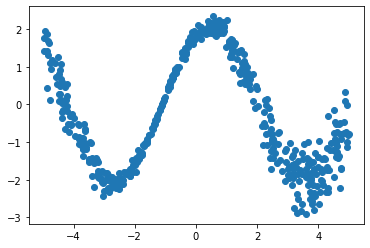

In [23]:
plt.scatter(X[0].reshape(-1), y[0])

In [24]:
input_x = np.linspace(-5,5,1000)
x = np.sin(input_x)+np.random.exponential(1,size=(len(input_x)))
x2=np.sin(input_x)

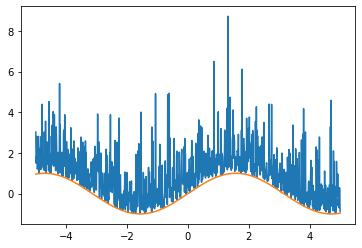

In [25]:
plt.plot(input_x,x)
plt.plot(input_x,x2)

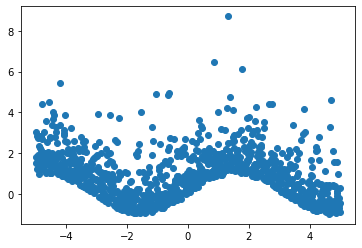

In [26]:
plt.scatter(input_x,x)

In [27]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
sinesh4_in_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/MLP2_DKT_outr_test_results.npy'
sinesh4_out_range = get_table(prefix,kernels)

In [28]:
sinesh4_in_range

,method,mse,nll
0,rbf,1.569 \pm 1.630,0.479 \pm 0.221
1,spectral,0.175 \pm 0.121,0.366 \pm 0.161
2,nn,0.181 \pm 0.107,0.453 \pm 0.227
3,flow_rbf,1.303 \pm 1.360,0.327 \pm 0.163
4,flow_spectral,0.218 \pm 0.136,0.435 \pm 0.193
5,flow_nn,0.195 \pm 0.124,0.170 \pm 0.151


In [29]:
sinesh4_out_range

,method,mse,nll
0,rbf,2.985 \pm 2.365,2.006 \pm 0.589
1,spectral,1.328 \pm 1.090,1.574 \pm 0.401
2,nn,5.849 \pm 12.092,8.636 \pm 6.553
3,flow_rbf,3.899 \pm 2.599,1.825 \pm 0.527
4,flow_spectral,1.137 \pm 0.898,1.347 \pm 0.383
5,flow_nn,4.738 \pm 6.285,2.919 \pm 1.925


In [30]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4_1e-2/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
sinesh4_in_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/MLP2_DKT_outr_test_results.npy'
sinesh4_out_range = get_table(prefix,kernels)

In [31]:
sinesh4_in_range

,method,mse,nll
0,rbf,NaN,NaN
1,spectral,NaN,NaN
2,nn,NaN,NaN
3,flow_rbf,1.463 \pm 1.691,0.330 \pm 0.148
4,flow_spectral,0.190 \pm 0.110,0.334 \pm 0.146
5,flow_nn,0.303 \pm 0.218,0.350 \pm 0.147


In [32]:
sinesh4_out_range

,method,mse,nll
0,rbf,2.985 \pm 2.365,2.006 \pm 0.589
1,spectral,1.328 \pm 1.090,1.574 \pm 0.401
2,nn,5.849 \pm 12.092,8.636 \pm 6.553
3,flow_rbf,3.899 \pm 2.599,1.825 \pm 0.527
4,flow_spectral,1.137 \pm 0.898,1.347 \pm 0.383
5,flow_nn,4.738 \pm 6.285,2.919 \pm 1.925


In [33]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
data = np.load(prefix.format("spectral"), allow_pickle=True).item()

In [34]:
data.keys()

dict_keys(['mse_list', 'nll_list', 'mean', 'lower', 'upper', 'x', 'y', 'mse', 'mse_std', 'nll', 'nll_std'])

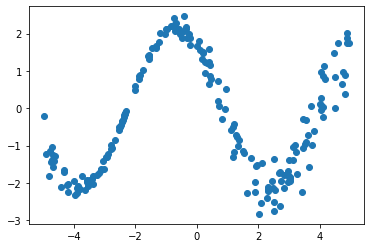

In [35]:
plt.scatter(data['x'][0], data['y'][0])

In [36]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
data = np.load(prefix.format("flow_spectral"), allow_pickle=True).item()

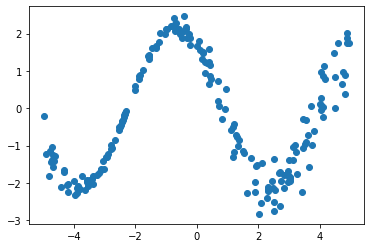

In [37]:
plt.scatter(data['x'][0], data['y'][0])

In [38]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/flow_nn/checkpoints/sines/plot_samples.npy'
sam = np.load(prefix.format("spectral"), allow_pickle=True).item()

In [39]:
sam.keys()

dict_keys(['gauss_samples', 'gauss_y', 'flow_samples', 'flow_y', 'true_y', 'true_x'])

In [40]:
import matplotlib.colors as mcolors
import seaborn as sns


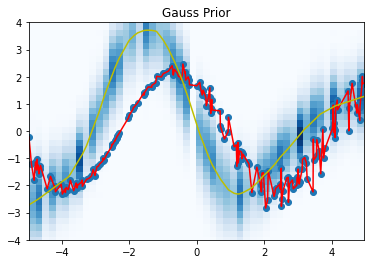

In [ ]:
import matplotlib.colors as mcolors
import seaborn as sns





X = sam["true_x"].numpy().reshape(-1)
ind = X.argsort()
#plt.plot(X[ind],np.array(sam["true_y"])[ind])
GP = [g.numpy() for g in sam["gauss_samples"]]
GP = np.array(GP)
GP = GP[ind]


gamma=0.5




A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
B = GP.reshape(-1)
plt.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
X = sam["true_x"].numpy().reshape(-1)
plt.scatter(X,sam["true_y"])
plt.plot(X[ind],np.array(sam["true_y"])[ind],c='r')
plt.plot(X[ind],np.array(sam["gauss_y"])[ind],c='y')
plt.title("Gauss Prior")
plt.ylim((-4,4))
plt.show()



f, ax = plt.subplots(figsize=(7, 7))
sns.kdeplot(A, y=B, shade=True, ax=ax)
plt.show()

ind = X.argsort()
#plt.plot(X[ind],np.array(sam["true_y"])[ind])
FP = [g.numpy() for g in sam["flow_samples"]]
FP = np.array(FP)
FP = FP[ind]
plt.show()


A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
B = FP.reshape(-1)
plt.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
X = sam["true_x"].numpy().reshape(-1)
plt.scatter(X,sam["true_y"])
plt.plot(X[ind],np.array(sam["true_y"])[ind],c='r')
plt.plot(X[ind],np.array(sam["flow_y"])[ind],c='y')
plt.title("Flow")
plt.ylim((-4,4))
plt.show()

In [41]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import seaborn as sns

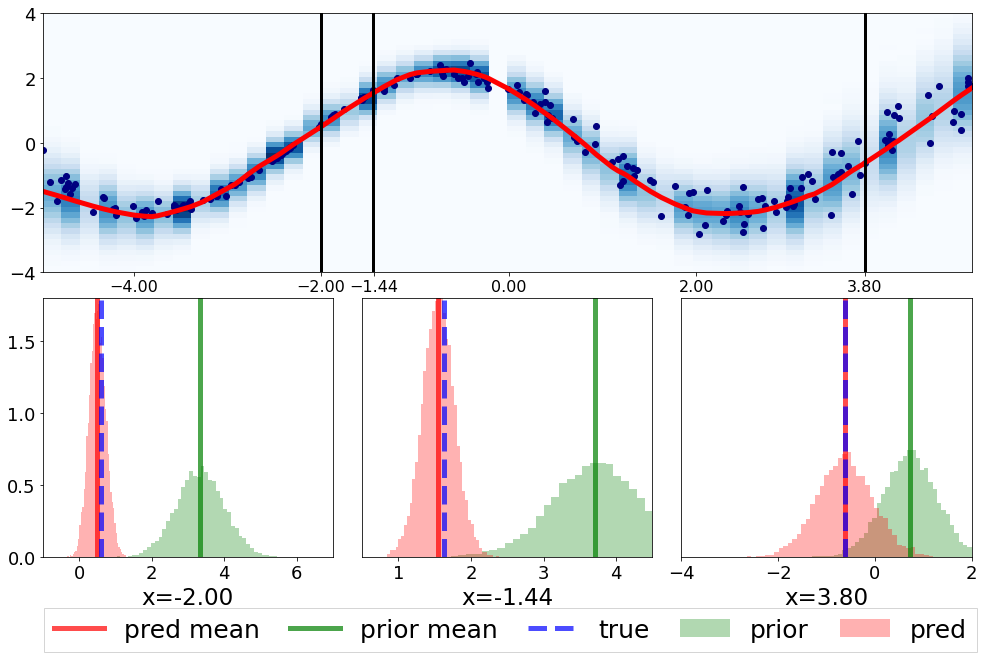

In [64]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30,10))
spec = fig.add_gridspec(ncols=3, nrows=2,left=0.05, right=0.48,
                        wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(spec[0, 0:3])

ax2a = fig.add_subplot(spec[1, 0])
ax2b = fig.add_subplot(spec[1, 1])
ax2c = fig.add_subplot(spec[1, 2])

ax2s = [ax2a, ax2b, ax2c]
gamma=0.5
ax2b.set_yticks([])
ax2c.set_yticks([])
#ax2.yaxis.tick_right()

# spec2 = fig.add_gridspec(nrows=2, ncols=3, left=0.52, right=0.98, wspace=0.10, hspace=0.1)

# ax3 = fig.add_subplot(spec2[0, 0:3])

# ax4a = fig.add_subplot(spec2[1, 0])
# ax4b = fig.add_subplot(spec2[1, 1])
# ax4c = fig.add_subplot(spec2[1, 2])

# ax4s = [ax4a, ax4b, ax4c]

# ax4b.set_yticks([])
# ax4c.set_yticks([])

prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/flow_nn/checkpoints/sines/plot_samples.npy'
sam = np.load(prefix, allow_pickle=True).item()


X = sam["true_x"].numpy().reshape(-1)
ind = X.argsort()
GP = [g.numpy() for g in sam["gauss_samples"]]
GP = np.array(GP)
GP = GP[ind]

FP = [g.numpy() for g in sam["flow_samples"]]
FP = np.array(FP)
FP = FP[ind]


A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
B = FP.reshape(-1)
ax1.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
ax1.set_ylim((-4,4))
ax1.scatter(X,sam["true_y"],c='navy',label="samples")
ax1.plot(X[ind],np.array(sam["flow_y"])[ind],c='r', label="prediction", linewidth=5)
#ax1.set_title("Flow + NN linear",size=20)
ax1.set_xlim((np.min(A), np.max(A)))


def plot_marginal(nr, ax2, ax1, GP, FP=None, lim=None):
    ax1.axvline(X[ind][nr],c='black',linewidth=3)
    ax2.set_xlabel("x={:.2f}".format(np.round(X[ind][nr],2)),size=23)
    if FP is not None:
        ax2.hist(GP[nr].reshape(-1), bins=50, density=True, facecolor='g', alpha=0.3, label="prior")  
        ax2.hist(FP[nr].reshape(-1), bins=50, density=True, facecolor='r', alpha=0.3, label="pred")
        ax2.axvline(np.array(sam["flow_y"])[ind][nr], 0, 1.6, color='r', alpha=0.7,label="pred mean", linewidth=5)
        ax2.axvline(np.array(sam["gauss_y"])[ind][nr], 0, 1.6, color='g', alpha=0.7,label="prior mean", linewidth=5)
        ax2.axvline(np.array(sam["true_y"])[ind][nr], 0, 1.6, color='b', alpha=0.7, linestyle="--", label="true", linewidth=5)
        ax2.set_xlim(lim)
    else:
        ax2.hist(GP[nr].reshape(-1), bins=50, density=True, facecolor='r', alpha=0.3, label="pred")                
        ax2.axvline(np.array(sam["gauss_y"])[ind][nr], 0, 1.6, color='r', alpha=0.7, label="pred mean", linewidth=5)
        ax2.axvline(np.array(sam["true_y"])[ind][nr], 0, 1.6, color='b',linestyle="--", alpha=0.7, label="true", linewidth=5)
        ax2.set_xlim(lim)  
    ax2.set_ylim((0,1.8))

plot_marginal(60, ax2a, ax1, GP, FP, lim=(-1,7))
plot_marginal(70, ax2b, ax1, GP, FP, lim=(0.5, 4.5))
plot_marginal(177, ax2c, ax1, GP, FP, lim=(-4,2))

T = list(set([-4,-2,0,2]+[np.round(X[ind][60],2), np.round(X[ind][70],2), np.round(X[ind][177],2)]))


ax1.set_xticks(T)


ax2a.legend(loc='upper center', bbox_to_anchor=(-0.04, -0.25, 3.3, 0.102), mode="expand",
          ncol=5, fancybox=False, shadow=False, prop={'size': 25})
# prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/spectral/checkpoints/sines/plot_samples.npy'
# sam = np.load(prefix, allow_pickle=True).item()


# X = sam["true_x"].numpy().reshape(-1)
# ind = X.argsort()
# GP = [g.numpy() for g in sam["gauss_samples"]]
# GP = np.array(GP)
# GP = GP[ind]


# A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
# B = GP.reshape(-1)
# ax3.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
# ax3.set_ylim((-4,4))
# ax3.scatter(X,sam["true_y"],c='navy')
# ax3.plot(X[ind],np.array(sam["gauss_y"])[ind],c='r')
# ax3.set_title("DKT+Spectral",size=20)
# ax3.set_xlim((np.min(A), np.max(A)))


# plot_marginal(60, ax4a, ax3, GP, lim=(-1,7))
# plot_marginal(70, ax4b, ax3, GP, lim=(0.5, 4.5))
# plot_marginal(177, ax4c, ax3, GP, lim=(-4,2))

# ax3.set_xticks(T)
# ax4a.legend(prop={'size': 15})

ax1.tick_params(axis='y', labelsize=18 ) 
#ax3.tick_params(axis='y', labelsize=15 ) 

ax1.tick_params(axis='x', labelsize=16 ) 
#ax3.tick_params(axis='x', labelsize=12 ) 

ax2a.tick_params(axis='y', labelsize=18 ) 
#ax4a.tick_params(axis='y', labelsize=15 ) 

ax2a.tick_params(axis='x', labelsize=18 ) 
ax2b.tick_params(axis='x', labelsize=18 ) 
ax2c.tick_params(axis='x', labelsize=18 ) 

plt.show()

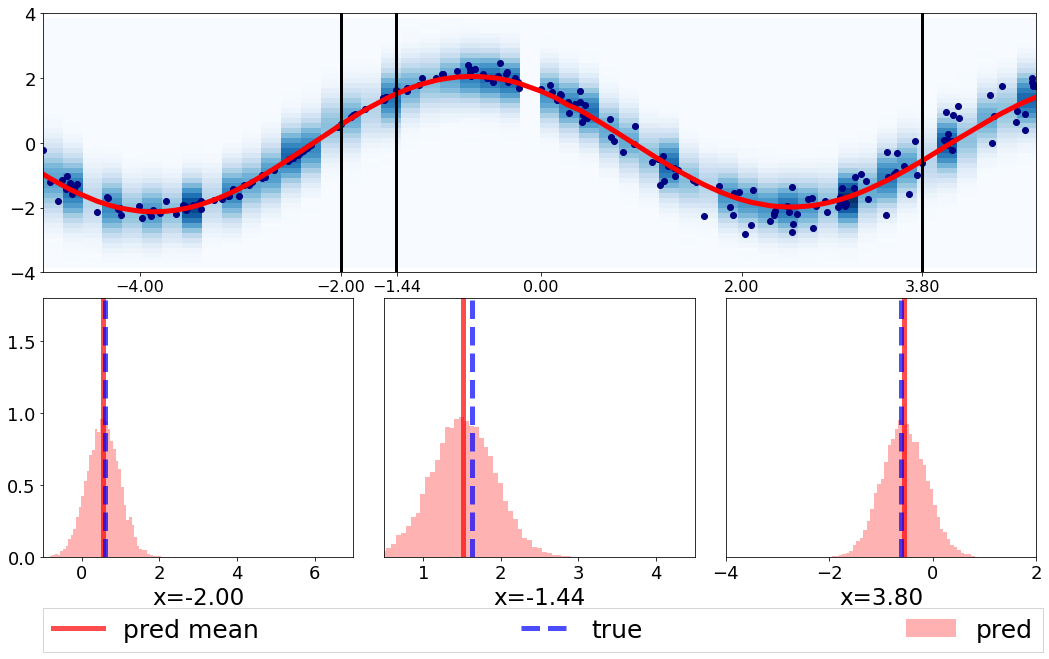

In [62]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30,10))
# spec = fig.add_gridspec(ncols=3, nrows=2,left=0.05, right=0.48,
#                         wspace=0.1, hspace=0.1)
# ax1 = fig.add_subplot(spec[0, 0:3])

# ax2a = fig.add_subplot(spec[1, 0])
# ax2b = fig.add_subplot(spec[1, 1])
# ax2c = fig.add_subplot(spec[1, 2])

# ax2s = [ax2a, ax2b, ax2c]

# ax2b.set_yticks([])
# ax2c.set_yticks([])
# #ax2.yaxis.tick_right()

spec2 = fig.add_gridspec(nrows=2, ncols=3, left=0.52, right=0.98, wspace=0.10, hspace=0.1)

ax3 = fig.add_subplot(spec2[0, 0:3])

ax4a = fig.add_subplot(spec2[1, 0])
ax4b = fig.add_subplot(spec2[1, 1])
ax4c = fig.add_subplot(spec2[1, 2])

ax4s = [ax4a, ax4b, ax4c]

ax4b.set_yticks([])
ax4c.set_yticks([])

# prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/flow_nn/checkpoints/sines/plot_samples.npy'
# sam = np.load(prefix, allow_pickle=True).item()


# X = sam["true_x"].numpy().reshape(-1)
# ind = X.argsort()
# GP = [g.numpy() for g in sam["gauss_samples"]]
# GP = np.array(GP)
# GP = GP[ind]

# FP = [g.numpy() for g in sam["flow_samples"]]
# FP = np.array(FP)
# FP = FP[ind]


# A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
# B = FP.reshape(-1)
# ax1.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
# ax1.set_ylim((-4,4))
# ax1.scatter(X,sam["true_y"],c='navy',label="samples")
# ax1.plot(X[ind],np.array(sam["flow_y"])[ind],c='r', label="prediction")
# ax1.set_title("Flow + NN linear",size=20)
# ax1.set_xlim((np.min(A), np.max(A)))


def plot_marginal(nr, ax2, ax1, GP, FP=None, lim=None):
    ax1.axvline(X[ind][nr],c='black',linewidth=3)
    ax2.set_xlabel("x={:.2f}".format(np.round(X[ind][nr],2)),size=23)
    if FP is not None:
        ax2.hist(GP[nr].reshape(-1), bins=50, density=True, facecolor='g', alpha=0.3, label="prior")  
        ax2.hist(FP[nr].reshape(-1), bins=50, density=True, facecolor='r', alpha=0.3, label="pred")
        ax2.axvline(np.array(sam["flow_y"])[ind][nr], 0, 1.6, color='r',  alpha=0.7, label="pred mean", linewidth=5)
        ax2.axvline(np.array(sam["gauss_y"])[ind][nr], 0, 1.6, color='g',  alpha=0.7, label="prior mean", linewidth=5)
        ax2.axvline(np.array(sam["true_y"])[ind][nr], 0, 1.6, color='b', alpha=0.7, label="true", linewidth=5)
        ax2.set_xlim(lim)
    else:
        ax2.hist(GP[nr].reshape(-1), bins=50, density=True, facecolor='r', alpha=0.3, label="pred")                
        ax2.axvline(np.array(sam["gauss_y"])[ind][nr], 0, 1.6, color='r',  alpha=0.7, label="pred mean", linewidth=5)
        ax2.axvline(np.array(sam["true_y"])[ind][nr], 0, 1.6, color='b', linestyle="--",  alpha=0.7, label="true", linewidth=5)
        ax2.set_xlim(lim)  
    ax2.set_ylim((0,1.8))

# plot_marginal(60, ax2a, ax1, GP, FP, lim=(-1,7))
# plot_marginal(70, ax2b, ax1, GP, FP, lim=(0.5, 4.5))
# plot_marginal(177, ax2c, ax1, GP, FP, lim=(-4,2))

T = list(set([-4,-2,0,2]+[np.round(X[ind][60],2), np.round(X[ind][70],2), np.round(X[ind][177],2)]))


# ax1.set_xticks(T)
# ax2a.legend(prop={'size': 15})


prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/spectral/checkpoints/sines/plot_samples.npy'
sam = np.load(prefix, allow_pickle=True).item()


X = sam["true_x"].numpy().reshape(-1)
ind = X.argsort()
GP = [g.numpy() for g in sam["gauss_samples"]]
GP = np.array(GP)
GP = GP[ind]


A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
B = GP.reshape(-1)
ax3.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma), cmap="Blues")
ax3.set_ylim((-4,4))
ax3.scatter(X,sam["true_y"],c='navy')
ax3.plot(X[ind],np.array(sam["gauss_y"])[ind],c='r', linewidth=5)
#ax3.set_title("DKT+Spectral",size=20)
ax3.set_xlim((np.min(A), np.max(A)))


plot_marginal(60, ax4a, ax3, GP, lim=(-1,7))
plot_marginal(70, ax4b, ax3, GP, lim=(0.5, 4.5))
plot_marginal(177, ax4c, ax3, GP, lim=(-4,2))

ax3.set_xticks(T)

ax4a.legend(loc='upper center', bbox_to_anchor=(-0.04, -0.25, 3.3, 0.102), mode="expand",
          ncol=5, fancybox=False, shadow=False, prop={'size': 25})

ax3.tick_params(axis='y', labelsize=18 ) 
#ax3.tick_params(axis='y', labelsize=15 ) 

ax3.tick_params(axis='x', labelsize=16 ) 
#ax3.tick_params(axis='x', labelsize=12 ) 

ax4a.tick_params(axis='y', labelsize=18 ) 
#ax4a.tick_params(axis='y', labelsize=15 ) 

ax4a.tick_params(axis='x', labelsize=18 ) 
ax4b.tick_params(axis='x', labelsize=18 ) 
ax4c.tick_params(axis='x', labelsize=18 ) 

plt.show()

In [ ]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_hetero4/{}/checkpoints/sines/plot_samples.npy'
sam = np.load(prefix.format("spectral"), allow_pickle=True).item()

In [ ]:
import matplotlib.colors as mcolors

ind = X.argsort()
#plt.plot(X[ind],np.array(sam["true_y"])[ind])
GP = [g.numpy() for g in sam["gauss_samples"]]
GP = np.array(GP)
GP = GP[ind]
plt.show()

gamma=0.5


A = X[ind].reshape(-1,1).repeat(10000, axis=1).reshape(-1)
B = GP.reshape(-1)
plt.hist2d(A,B, bins=50, norm=mcolors.PowerNorm(gamma),cmap="Blues")
X = sam["true_x"].numpy().reshape(-1)
plt.scatter(X,sam["true_y"])
#plt.plot(X[ind],np.array(sam["true_y"])[ind],c='r')
plt.plot(X[ind],np.array(sam["gauss_y"])[ind],c='y')
plt.ylim((-4,4))
plt.title("Gauss Prior")
plt.show()


# EXP

In [31]:
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_exp/{}/checkpoints/sines/MLP2_DKT_test_results.npy'
sines_in_range = get_table(prefix,kernels)
prefix='/home/anowak/projects/deep-kernel-transfer/save/sines1d_exp/{}/checkpoints/sines/MLP2_DKT_outr_test_results.npy'
sines_out_range = get_table(prefix,kernels)

In [32]:
sines_in_range

,method,mse,nll
0,rbf,1.808 \pm 1.565,0.816 \pm 0.095
1,spectral,0.751 \pm 0.677,0.804 \pm 0.105
2,nn,0.431 \pm 0.270,0.776 \pm 0.095
3,flow_rbf,1.449 \pm 1.239,0.815 \pm 0.107
4,flow_spectral,0.700 \pm 0.449,0.878 \pm 0.164
5,flow_nn,0.417 \pm 0.212,0.773 \pm 0.092


In [33]:
sines_out_range

,method,mse,nll
0,rbf,2.530 \pm 2.134,0.857 \pm 0.095
1,spectral,0.772 \pm 0.594,0.817 \pm 0.104
2,nn,6.373 \pm 9.046,2.904 \pm 1.989
3,flow_rbf,4.602 \pm 3.292,0.886 \pm 0.111
4,flow_spectral,2.162 \pm 2.233,0.992 \pm 0.241
5,flow_nn,7.060 \pm 9.996,2.696 \pm 1.680
